<a href="https://colab.research.google.com/github/VGuerrero07/Data_Science/blob/master/Churn_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Rate Prediction using Machine Learning

One of the most important metrics for any company: It’s the metric by which businesses, young and old, live or die. Letting your churn rate creep higher can lead to several related problems (source: [Profitwell](https://www.profitwell.com/blog/churn-analysis)).

<p align=center>
<img src="https://nextommerce.com/wp-content/uploads/2019/04/pasted-image-0-1024x513.png" width="60%">
</p>

In this Project, the primary goal is to predict, using Data Science and Machine Learning, if a customer is going to keep or stop buying the company's product or services.

## What is Churn, and why is it so important?


According to [Investopedia](https://www.investopedia.com/terms/c/churnrate.asp), the Churn Rate is **"the rate at which customers stop doing business with an entity"**. For a company such as Spotify, Amazon, or Netflix, it represents the percentage of subscribers that discontinue their subscriptions within a time, in a way that a high churn rate could adversely affect profits and impede growth.

Using an analogy for understanding what is Churn Rate: imagine that you have a bucket, and must fill it up with water. If there are many holes in the bucket, it gets more and more difficult to complete your goal; therefore, you must fix the holes as soon as possible, it needs less effort and less water. 

<p align=center>
<img src="https://blog.phonetrack.com.br/wp-content/uploads/2018/11/churn-rate-blog.png" width="40%">
</p>

Analyzing the Churn Rate of your business can help identifying potencial cancelations and promote customer-based actions for their retention. This metric should also be target for attention because the Customer Acquisition Cost (CAC) is normally higher than the cost for keeping them. 


## The Project

This Data Science Project has the goal to create a Machine Learning algorithm to predict customer churn. It is going to be divided into the following sections:

* Getting the Data
* Analyzing the Data
* Creating the Machine Learning Algorithm
* Results



### Getting the Data

The dataset used in this project can be found [here](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv): it was originally published by [IBM Developer Learning Platform](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) and represents a common problem in a Telecom Company.

There is no extra information available, but after reading the columns we can deduce what they represent and how to use them.

First, we must import the library Pandas, and right after that we can take a look into our dataset.

In [1]:
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# importing pandas, numpy, seaborn and matplotlib libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing other relevant libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# style
sns.set_style('dark')
# random seed
np.random.seed(42)

# importing the data
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# know the size of the imported dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# check first 5 entries
df.head()

The dataset has 7043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Analysis

Now that we could take a brief look into our dataset, let's have an overview: name of columns, unique values, missing values, each column's type... there is a lot to see!

In [4]:
print(f"Name of columns: {df.columns.values}\n")
print("Missing values per column:\n")
print(df.isnull().sum())
print("\nType for each column:\n")
print(df.dtypes)
print("\nUnique values:\n")
print(df.nunique())

Name of columns: ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Missing values per column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Type for each column:

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure 

There is no missing values, so it is one step less for our ML model. We also can see that:

* Column `customer ID` does not represent anything relevant other than an identification for each customer.
* Column`TotalCharges` is formatted as string, when it should be float.
* Or target Variable is the column `Churn`, that indicates whether that customer stopped doing business or not.
* There are many columns not formatted as numbers, needed for our Machine Learning algorithm. They should be transformed before proceeding to our model.

When trying to convert the column `Total Charges` to a float number, a Value Error was found: some values in this column represent a missing value, but as a string `""`. Therefore, a function had to be created in order to convert the strings in this column to float numbers, or to missing values, so we can fill them using the median (that way, we can avoid outliers).

Also, as the column `customerID` does not represent something usable, I had it dropped.

In [5]:
def str_to_float(input):
    """
This function converts a string into float.

# Arguments:
    input: values from column TotalCharges

# Return
    Nan, if string is not convertable
    Value converted into float
    """

    try:
        return float(input)
    except ValueError:
        return np.nan

In [6]:
# creating a copy of the DataFrame:
df_clean = df.copy()

# cleaning the DataFrame
df_clean.drop(columns='customerID', axis=1, inplace=True)

df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(str_to_float)

# Verify missing data
print(f"Missing data in the column TotalCharges was {df_clean['TotalCharges'].isnull().sum()} values.")

# filling missing data with median
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Missing data in the column TotalCharges was 11 values.


It is also possible to use the method `describe` to find some statistics in the non-categorical columns: `tenure`, `MonthlyCharges` and `TotalCharges`.

Looking at the boxplots for both Charges, we see that no Outliers are presented in those columns.

In [7]:
df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


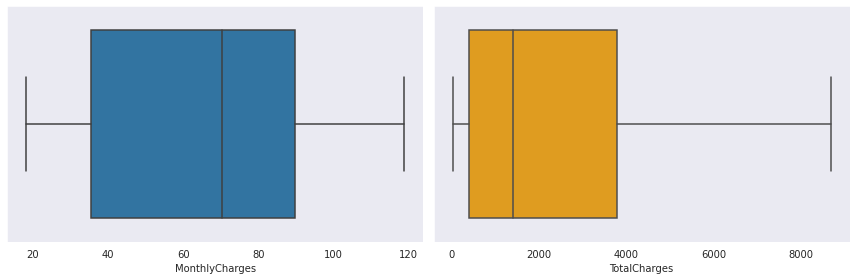

In [8]:
# plotting boxplots for MonthlyCharges and TotalCharges
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean["MonthlyCharges"], ax=ax[0])
sns.boxplot(df_clean["TotalCharges"], ax=ax[1], color='orange')
fig.tight_layout()

The column `tenure` represents the amount of time a customer stays with the business, meaning that a high tenure represents high customer fidelity. Plotting this column as a `countplot`, the most logical conclusion to asusme is that the variable is measured in months.

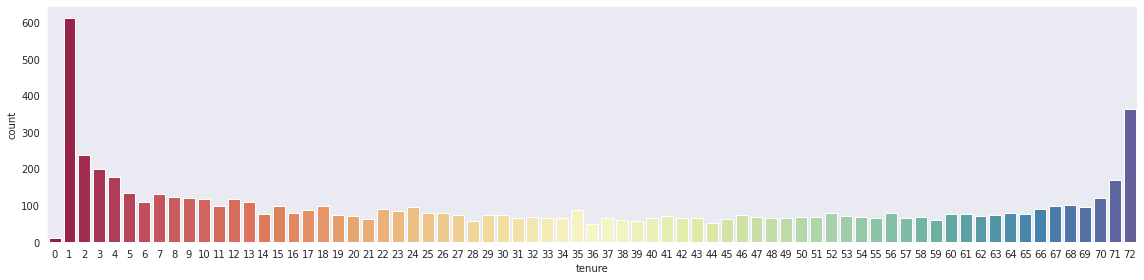

In [9]:
# plotting countplot for tenure
fig,ax = plt.subplots(figsize=(16,4))
sns.countplot(df['tenure'], ax=ax,palette='Spectral')
plt.tight_layout()

Now it is time to understand the categorical columns. It is important, first, to have a look in the unique values. This enables us to understand different labels that have the same meaning with each other.

For example, we can see that values `No`, `No phone service` and `No internet service` may have the same meaning, and any data scientist can consider it. However, I am not going to do it, and each label will be trated separately.

In [10]:
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

The first column I am going to analyze is `gender`, so we see if the samples are equally distributed between men and women.

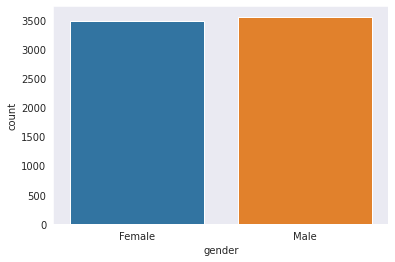

In [11]:
sns.countplot(df['gender'])
plt.show()

Also, I must check if the column `Churn` is balanced or imbalanced, as it can influence negatively the results of the Machine Learning algorithm.

We can see that the column is imbalanced and it must be considered before training the dataset.

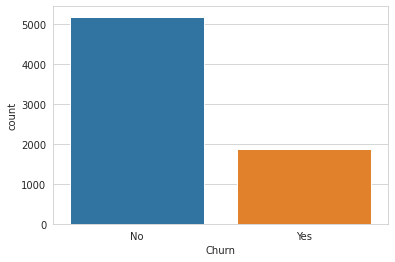

In [12]:
sns.set_style("whitegrid")
sns.countplot(df['Churn'])

plt.show()

In [13]:
df[df['Churn']=="Yes"].shape[0]/df[df['Churn']=="No"].shape[0]

0.36122922303826827

### Machine Learning

Now, we already have a good understanding of our dataset. We know that we have imbalanced data, no outliers in the numerical columns, and no missing values in the categorical columns.

In this section, I have to prepare the data, select the best Machine Learning Model, and tune its hyperparameters for a better result.

#### Processing the Data

First off, let's process the data: splitting it into 2 groups: categorical variables and numerical variables., will make the transformations easier.

Then, I am going to use [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform and normalize labels such that they contain only values between 0 and `n_classes-1`; and [`get_dummies`](https://www.w3resource.com/pandas/get_dummies.php) to convert categorical variable into dummy/indicator variables.

In [14]:
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

df_processed = df_clean.copy()

# Label Encoder for 
le = LabelEncoder()
for var in binary_var:
  df_processed[var] = le.fit_transform(df_processed[var])

# Get Dummies for categorical variables.
df_processed = pd.get_dummies(df_processed, columns=cat_var)

# Checking first 5 entries
df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


#### Preparing the model

Now, our data is processed and it is possible to start building the Machine Learning model.

To begin with, I am going to split the dataset into X (our entries) and y (`Churn`, our target variable). Then, I am going to split these datasets into train and test sets, for our model to use.

In [15]:
# Getting Target Variable
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Splitting into train and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

After splitting, I am going to create a function that uses [cross validation](https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f) to get the mean value of a performance metric. In this case, since I want the model to find all customers with a big potential of Churn, I decided to use the [**recall score**](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall).

To read more about Cross Validation and Recall (and other performance) score, click the links!

In [16]:
def val_score(X, y, model, printing=True):
    """
    Performs cross validation for a determined model, given the target y and the inputs X.

    X: entries for the model;
    y: target values for each entry;
    model: Scikit-learn machine learning model, like Random Forest, Logistic Regression, Linear Regression, etc.
    printing: True if printing recall score, False otherwise
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), model)
    scores = cross_val_score(pipeline, X, y, scoring='recall')
    if printing == True:
        print(f"Recall: {scores.mean():.2f} (+/- {scores.std():.2f})")
    
    return scores.mean()


For the initial score, in order to get a baseline, the algorithm I will choose is the Decision Tree Classifier. It does not need initial data processing and it is great for a baseline.

In [17]:
dtc = DecisionTreeClassifier()
score_baseline = val_score(X_train, y_train, dtc)

Recall: 0.50 (+/- 0.02)


With the value obtained, we can start training different models and see which one has the best recall score. It is important to balance the data before full training: imbalanced data may cause overfitting in some models and generate a biased result.

For sampling, the technique I am going to use is UnderSampling, which involves randomly deleting examples from the majority class. Also, I am going to use SMOT (Synthetic Minority Oversampling Technique) to combine and check in which case I achieved the best results.

In [18]:
# scaling the data
std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)

# sampling the data 
rus = RandomUnderSampler()
over = SMOTE()
X_train_smote, y_train_smote = over.fit_sample(X_train_std, y_train)
X_train_rus, y_train_rus = rus.fit_sample(X_train_std, y_train)


In [19]:
# instantiate models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# evaluate recall as performance score - UNDERSAMPLING ONLY
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_score(X_train_rus, y_train_rus, clf, printing=False))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.746763
DecisionTreeClassifier,0.687770
SGDClassifier,0.714388
SVC,0.782734
LogisticRegression,0.794964
XGBClassifier,0.798561
LGBMClassifier,0.751799


In [20]:
model = []
recall = []
# evaluate recall as performance score - SMOTE ONLY
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_score(X_train_smote, y_train_smote, clf, printing=False))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.865185
DecisionTreeClassifier,0.779107
SGDClassifier,0.783931
SVC,0.846129
LogisticRegression,0.810129
XGBClassifier,0.844133
LGBMClassifier,0.830796


Considering both dataframes above, the chosen model is XGBClassifier, and using SMOTE techniques. Even though XGBClassifier has presented slightly worse results comparing to RandomForest, the amount of parameters it has available for tuning provides the best possible options for me. 

#### Hyperparameter Tuning

Now, in order to have a better performance from our model, I am going to make some adjustments in my XGBoost hyperparameters. [In this article](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624), there is some information about how to tune, and why it is so important.

For a XGBoost model, there are many parameters to tune (find them [here](https://xgboost.readthedocs.io/en/latest/parameter.html)). Is this project, I have chosen the following:

* `gamma`
* `max_depth`
* `min_child_weight`
* `learning_rate`
* `n_estimators`

Let's tune!

In [32]:
xgb = XGBClassifier()

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identify the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smote, y_train_smote)

# getting results
print(f"Best result: {grid_result.best_score_:.5f} for {grid_result.best_params_}")

Best result: 0.86948 for {'n_estimators': 50}


With the best value of recall obtained with `n_estimators` equal to 50, I am going to fix this parameter and tune the others.

In [33]:
xgb = XGBClassifier(n_estimators=50)

param_grid = {
  'max_depth':range(1,10,1),
  'min_child_weight':range(1,10,1)
}

# identify the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smote, y_train_smote)

# getting results
print(f"Best result: {grid_result.best_score_:.5f} for {grid_result.best_params_}")

Best result: 0.87153 for {'max_depth': 3, 'min_child_weight': 9}


In [34]:
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=9)

param_grid = {
    'gamma':[i/10 for i in range(0,10)]
}

# identify the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smote, y_train_smote)

# getting results
print(f"Best result: {grid_result.best_score_:.5f} for {grid_result.best_params_}")

Best result: 0.87281 for {'gamma': 0.4}


In [35]:
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=5, gamma=0.4)

param_grid = {
    'learning_rate':[0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.3, 0.5, 0.7, 1]
}

# identify the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smote, y_train_smote)

# getting results
print(f"Best result: {grid_result.best_score_:.5f} for {grid_result.best_params_}")

Best result: 0.86254 for {'learning_rate': 0.07}


So, after all this tuning, the parameters used for obtaining the best recall result (considered the most important metric for this poject) are:

* `gamma` = 0.0
* `max_depth` = 3
* `min_child_weight` = 5
* `learning_rate` = 0.01
* `n_estimators` = 50

It is important to say that this was only my understanding of the problem, but this tuning can be performed for other metrics such as accuracy, f1-score, precision, and many more.

Only now I can use my test set and check the real efficiency of my model:

#### Testing the Model

Now, the XGBoost Classifier model that I have optimized before is going to be tested with the data from the test set (`X_test` and `y_test`).

This step is really important: as you want your model to be efficient for future usage, you must always check the efficiency of your model in the **TEST DATA**.

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1282
           1       0.55      0.78      0.65       479

    accuracy                           0.77      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.81      0.77      0.78      1761

AUC: 0.7743



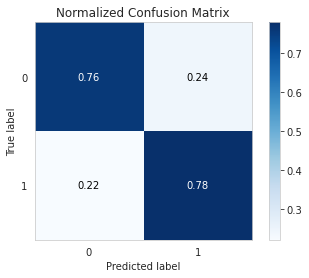

In [36]:
# Tuned Model
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=9, gamma=0.4, learning_rate=0.07)
xgb.fit(X_train_smote, y_train_smote)

# Scaling test set
X_test_std = std.transform(X_test)

# Predicting
y_pred = xgb.predict(X_test_std)

# Classification Report
print(classification_report(y_test, y_pred))

# Print AUC for ROC curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


This model has obtained a AUC score of approximately 0.77 (read more about this metric [here](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)). The recall score obtained for the test set was 0.78, indicating that **78% of the** **Churn customers** were correctly found by it.

Also, it indicates the difference between the sets used in the model: it does not matter if you have the best possible fit for your training set if the results obtained for your test set are not satisfying.

##### Comparing the model with UnderSampling

Now, just for a matter of curiosity, let's just see the results using only UnderSampling, but with the same tuning as before, and compare them!

              precision    recall  f1-score   support

           0       0.93      0.71      0.80      1282
           1       0.52      0.86      0.65       479

    accuracy                           0.75      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.82      0.75      0.76      1761

AUC: 0.7813



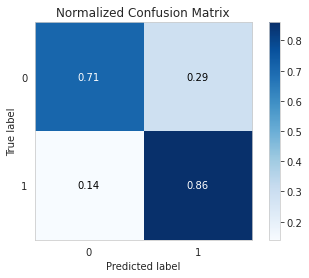

In [37]:
# Tuned Model
xgb2 = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=9, gamma=0.4, learning_rate=0.07)
xgb2.fit(X_train_rus, y_train_rus)

# Predicting
y_pred2 = xgb2.predict(X_test_std)

# Classification Report
print(classification_report(y_test, y_pred2))

# iPrint AUC for ROC curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred2)))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred2, normalize=True)
plt.show()

This shows the importance of testing the models: even though the initial scores for SMOTE were higher, the actual value in the test set was almost the same for both sampling techniques when testing.

Finally, the results for both models show that more than 3 in 4 customers willing to stop purchasing products/services from this company can be targeted for policies to avoid his evasion.

## Conclusion

We can conclude that Machine Learning is more than training a model, but actually is obtaining the best possible model for data it wasn't trained on. As we do not know future entries, it does not matter if you model is the best fit possi ble for your training and does not give satisfying results for other data.

Also, more can be done for this model to perform better, such as feature engineering, feature selection, tuning of other parameters, and many more.

Surely, Companies have entire divisions focusing only in optimizing Machine Learning Models, and learning/applying it in your business may help you achieving higher, better results!

